## 🎵 Spotify Hitmeter 🎵


An app that uses the Spotify API and a database of top songs to predict a song's popularity. I have trained a linear regression model that tries to predict the popularity of a song. The Spotify API does provide the popularity index, but this is done with factors like their monthly listeners, country, etc. This code will try to eliminate the bias by assigning a popularity index just using the features of the music.

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Reading the data
<hr>
The data can be read into a pandas' DataFrame variable by using the 'read_csv' function. This function reads the csv file into the DataFrame variable 'df'

In [164]:
df = pd.read_csv('spotify_data.csv')
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning the data
<hr>
First, We try to clean the data by removing irrelevant variables. In this case, the field would be 'title', 'artist', 'top genre','year released', 'top year' and 'artist type'. Moreover, we also remove the field 'pop' as that would be our dependant variable.

<div class = "alert alert-info"><b>Note:</b> We also have to remove all the rows where pop is NaN.</div>

In [165]:

df = df.dropna()

x = df.drop(['pop','title', 'artist', 'top genre','year released', 'top year', 'artist type'], axis = 1)
y = df['pop'].to_frame()

Now, we face another challenge where the date added of each song is not an integer. There's multiple ways of doing this, but I would be converting each element in the 'added' column to an integer by removing the hyphen.

In [166]:
x['added'] = [int(i.replace('‑','')) for i in x['added']]
x.loc('added')

,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,20220217,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0
1,20220217,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0
2,20220217,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0
3,20220217,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0
4,20220217,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0
...,...,...,...,...,...,...,...,...,...,...
995,20200622,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0
996,20200622,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0
997,20200622,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0
998,20200820,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0


## Training the machine using linear regression
<hr>
In this section, I use the sklearn library to use their linear regression model for training my model. Apart from training, I also want to test the model and see how well it performs. Again, by using the sklearn library I can split the data and use the partitions for training and testing my model.

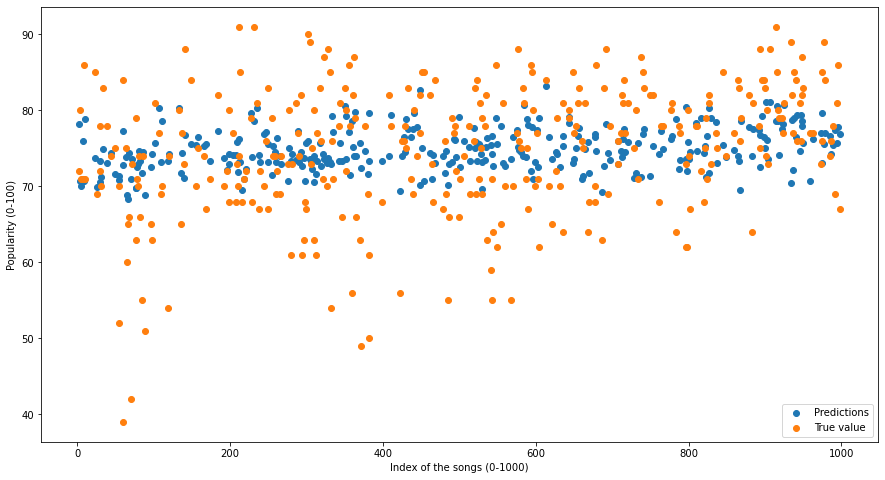

R-Squared score of my model: 0.06891864292318295


In [167]:
# Spliting the data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Creating our model
LR = LinearRegression()
LR.fit(x_train,y_train)

# Making the predictions using our test data
y_prediction =  LR.predict(x_test)


# Plotting the predicted values and the true values to visually see the predictions
plt.figure().set_size_inches(15,8)
plt.scatter(x_test.index,y_prediction, label = "Predictions")
plt.scatter(x_test.index,y_test, label = "True value")

plt.xlabel("Index of the songs (0-1000)")
plt.ylabel("Popularity (0-100)")
plt.legend(loc="lower right")

plt.show()

print(f'R-Squared score of my model: {r2_score(y_test, y_prediction)}')


<hr>
The low R-Squared score shows that the trend is weaker and the predictions aren't very accurate

## User Interface

<hr>
The user can add a spotify link to the interface and get a predicted popularity of the song.

In [168]:
# Declaring globale variables to be used by my GUI
x_new = pd.DataFrame()
input_x = pd.DataFrame()

In [169]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

cid = '88e65c00e56047228528f975d7573389'
secret = '1ea5f96c0117421ca677aa3e9561fe23'

client_credentials_manager = spotipy.SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [237]:
import tkinter as tk
from tkinter import ttk
import pyperclip

# Root for tkinter
root = tk.Tk()
root.geometry('400x600')

# Variable for storing the URL
url = tk.StringVar()

#Setting up the UI
frame = ttk.Frame(root)
frame.grid()

tk.Label(root, text = "Song spotify URL").grid(row=0)

entry = tk.Entry(root, textvariable = url)
entry.grid(row=0, column=1)

tk.Button(root, text = 'Submit', command = submit_url).grid(row=0, column=2, pady = 10)
tk.Button(root, text = 'Paste', command = paste_url).grid(row=0, column=3, pady = 10)
tk.Button(root, text = 'Clear', command = clear).grid(row=0, column=4, pady = 10)

root.mainloop()

HTTP Error for GET to https://api.spotify.com/v1/tracks/ with Params: {'market': None} returned 400 due to invalid id
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\lib\site-packages\spotipy\client.py", line 245, in _internal_call
    response.raise_for_status()
  File "C:\Users\harsh\anaconda3\lib\site-packages\requests\models.py", line 953, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 400 Client Error: Bad Request for url: https://api.spotify.com/v1/tracks/

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\harsh\AppData\Local\Temp/ipykernel_14192/2800578816.py", line 3, in submit_url
    meta = sp.track(track_url)
  File "C:\Users\harsh\anaconda3\lib\site-packages\spotipy\client.py", line 345, in tr

HTTP Error for GET to https://api.spotify.com/v1/tracks/ with Params: {'market': None} returned 400 due to invalid id
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\lib\site-packages\spotipy\client.py", line 245, in _internal_call
    response.raise_for_status()
  File "C:\Users\harsh\anaconda3\lib\site-packages\requests\models.py", line 953, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 400 Client Error: Bad Request for url: https://api.spotify.com/v1/tracks/

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\harsh\AppData\Local\Temp/ipykernel_14192/2800578816.py", line 3, in submit_url
    meta = sp.track(track_url)
  File "C:\Users\harsh\anaconda3\lib\site-packages\spotipy\client.py", line 345, in tr

In [236]:
def submit_url():
    track_url = url.get()
    meta = sp.track(track_url)
    features = sp.audio_features(track_url)[0]
    
    # Setting the features
    added = int(meta['album']['release_date'].replace('-',''))
    bpm = features['tempo']
    nrgy = features['energy']*100
    dnce = features['danceability']*100
    dB = features['loudness']
    live = features['liveness']*100
    val = features['valence']*100
    dur = int(features['duration_ms']/1000)
    acous = features['acousticness']*100
    spch = features['speechiness']*100
    
    # Fetching the actual popularity
    pop = int(meta['popularity'])
    
    # Updating the row
    d = {'added' : added, 'bpm': bpm, 'nrgy' : nrgy, 'dnce': dnce, 'dB' : dB, 'live' : live, 'val' : val, 'dur' : dur, 'acous' : acous, 'spch' : spch}

    # Making the prediction
    input_x = x_new.append(d, ignore_index = True)
    prediction = LR.predict(input_x)
    
    # Displaying the answer in the UI
    tk.Label(root, text = f'{meta["name"]} by {meta["artists"][0]["name"]}\n').grid(row = 2, column = 0, columnspan = 2, sticky='W')
    tk.Label(root, text = f'-----------------------').grid(row = 3, column = 0, columnspan = 2, sticky='W')
    tk.Label(root, text = f'Predicted popularity index : {prediction[0][0]:.2f}').grid(row = 4, column = 0, columnspan = 2, sticky='W')
    tk.Label(root, text = f'Actual popularity index : {pop}').grid(row = 5, column = 0, columnspan = 2, sticky='W')
    tk.Label(root, text = f'-----------------------\n').grid(row = 6, column = 0, columnspan = 2, sticky='W')
    
    # Printing extra details
    row_start = 7
    for i in features:
        tk.Label(root, text = f'{i}: {features[f"{i}"]}').grid(row = row_start, column = 0, columnspan = 1, sticky='W')
        row_start += 1
        if i == 'type':
            break

def paste_url():
    entry.delete(0,"end")
    entry.insert(0, pyperclip.paste())

def clear():
    entry.delete(0,"end")
    